<a href="https://colab.research.google.com/github/dianatuyen/DS-3001-project_gss/blob/main/Project_GSS_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/DS3001/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 23 (delta 6), reused 1 (delta 1), pack-reused 15
Receiving objects: 100% (23/23), 23.94 MiB | 11.72 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#
var_list = ['age', 'polviews','racerank1'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
df =  pd.read_csv('/content/selected_gss_data.csv') # Load dataset
df.head() # Preview dataset

,age,polviews,racerank1
0,48.0,"moderate, middle of the road",NaN
1,25.0,slightly liberal,NaN
2,42.0,slightly conservative,NaN
3,24.0,liberal,NaN
4,24.0,slightly conservative,NaN


In [ ]:
print(df['racerank1'].value_counts())

white                               2514
black or african-american            565
hispanic                             146
some other race                       66
american indian or alaska native      63
asian indian                          36
chinese                               26
filipino                              25
other asian                           16
korean                                11
vietnamese                             9
japanese                               8
other pacific islander                 3
samoan                                 2
guamanian or chamorro                  1
Name: racerank1, dtype: int64


In [ ]:
# Check racerank1 label
print(df['racerank1'].value_counts())
print(df['racerank1'].isnull().sum())

# Replace missing values with string 'missing label'
df['racerank1'].fillna('missing label', inplace=True)

# Define the mapping dictionary for racerank1 (according to codebook)
racerank1_mapping = {
    'white': 1,
    'black or african-american': 2,
    'american indian or alaska native': 3,
    'asian indian': 4,
    'chinese': 5,
    'filipino': 6,
    'japanese': 7,
    'korean': 8,
    'vietnamese': 9,
    'other asian': 10,
    'native hawaiian': 11,
    'guamanian or chamorro': 12,
    'samoan': 13,
    'other pacific islander': 14,
    'some other race': 15,
    'hispanic': 16,
    'missing label': 17
}

# Create the new column 'racerank1_numeric' based on the mapping
df['racerank1_numeric'] = df['racerank1'].map(racerank1_mapping)

# Display the updated DataFrame
df

white                               2514
black or african-american            565
hispanic                             146
some other race                       66
american indian or alaska native      63
asian indian                          36
chinese                               26
filipino                              25
other asian                           16
korean                                11
vietnamese                             9
japanese                               8
other pacific islander                 3
samoan                                 2
guamanian or chamorro                  1
Name: racerank1, dtype: int64
20639


,age,polviews,racerank1,racerank1_numeric
0,48.0,"moderate, middle of the road",missing label,17
1,25.0,slightly liberal,missing label,17
2,42.0,slightly conservative,missing label,17
3,24.0,liberal,missing label,17
4,24.0,slightly conservative,missing label,17
...,...,...,...,...
24125,22.0,extremely liberal,white,1
24126,29.0,"moderate, middle of the road",white,1
24127,32.0,slightly liberal,white,1
24128,49.0,slightly liberal,white,1


In [ ]:
# Define the mapping dictionary for polviews
polviews_mapping = {
    'extremely liberal': 1,
    'liberal': 2,
    'slightly liberal': 3,
    'moderate, middle of the road': 4,
    'slightly conservative': 5,
    'conservative': 6,
    'extremely conservative': 7
}

# Create the new column 'polviews_numeric' based on the mapping
df['polviews_numeric'] = df['polviews'].map(polviews_mapping)

order = ['extremely liberal', 'liberal', 'slightly liberal', 'moderate, middle of the road','slight conservative','conservative','extremely conservative']
# Sort polviews by order
df['polviews'] = pd.Categorical(df['polviews'], order)
# Display the updated DataFrame
df

,age,polviews,racerank1,racerank1_numeric,polviews_numeric
0,48.0,"moderate, middle of the road",missing label,17,4.0
1,25.0,slightly liberal,missing label,17,3.0
2,42.0,NaN,missing label,17,5.0
3,24.0,liberal,missing label,17,2.0
4,24.0,NaN,missing label,17,5.0
...,...,...,...,...,...
24125,22.0,extremely liberal,white,1,1.0
24126,29.0,"moderate, middle of the road",white,1,4.0
24127,32.0,slightly liberal,white,1,3.0
24128,49.0,slightly liberal,white,1,3.0


<Axes: xlabel='age', ylabel='Count'>

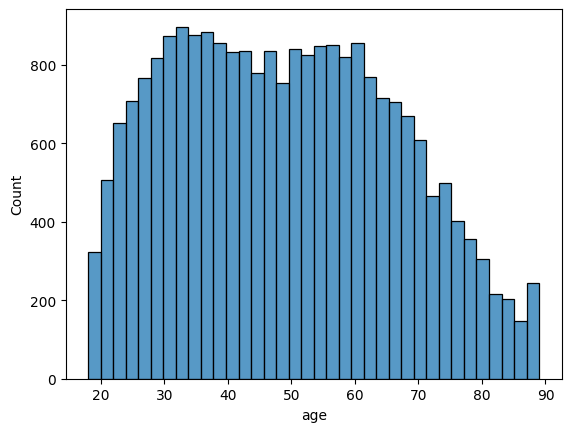

In [ ]:
# Histogram for each variable
sns.histplot(df['age'])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'extremely liberal'),
  Text(1, 0, 'liberal'),
  Text(2, 0, 'slightly liberal'),
  Text(3, 0, 'moderate, middle of the road'),
  Text(4, 0, 'slight conservative'),
  Text(5, 0, 'conservative'),
  Text(6, 0, 'extremely conservative')])

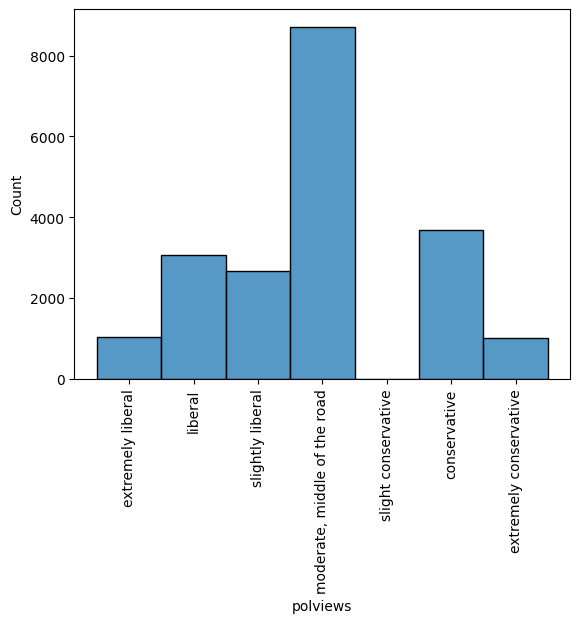

In [ ]:
sns.histplot(df['polviews'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'missing label'),
  Text(1, 0, 'white'),
  Text(2, 0, 'hispanic'),
  Text(3, 0, 'american indian or alaska native'),
  Text(4, 0, 'black or african-american'),
  Text(5, 0, 'chinese'),
  Text(6, 0, 'korean'),
  Text(7, 0, 'asian indian'),
  Text(8, 0, 'filipino'),
  Text(9, 0, 'some other race'),
  Text(10, 0, 'japanese'),
  Text(11, 0, 'vietnamese'),
  Text(12, 0, 'other asian'),
  Text(13, 0, 'other pacific islander'),
  Text(14, 0, 'samoan'),
  Text(15, 0, 'guamanian or chamorro')])

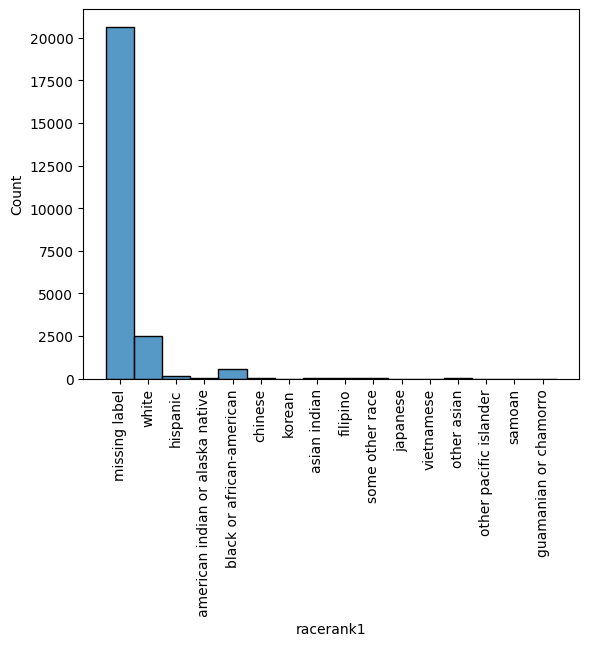

In [ ]:
sns.histplot(df['racerank1'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'white'),
  Text(1, 0, 'hispanic'),
  Text(2, 0, 'american indian or alaska native'),
  Text(3, 0, 'black or african-american'),
  Text(4, 0, 'chinese'),
  Text(5, 0, 'korean'),
  Text(6, 0, 'asian indian'),
  Text(7, 0, 'filipino'),
  Text(8, 0, 'some other race'),
  Text(9, 0, 'japanese'),
  Text(10, 0, 'vietnamese'),
  Text(11, 0, 'other asian'),
  Text(12, 0, 'other pacific islander'),
  Text(13, 0, 'samoan'),
  Text(14, 0, 'guamanian or chamorro')])

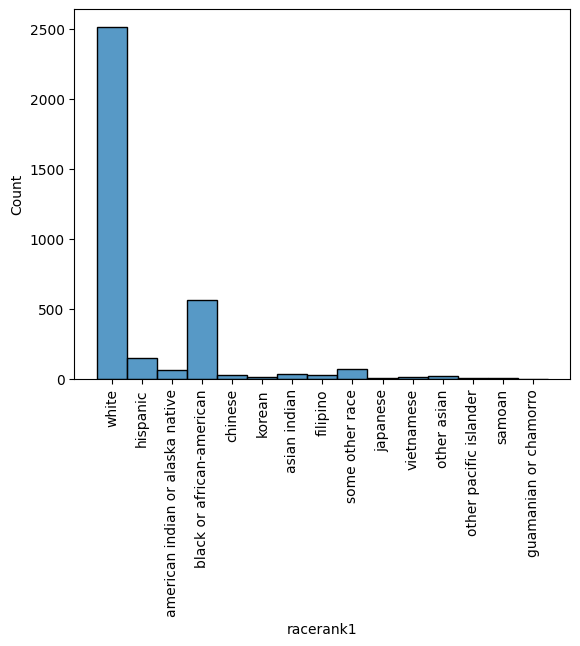

In [ ]:
# create a Boolean mask for the rows to remove
mask = df['racerank1'] == 'missing label'

# Drop missing label from racerank1
sns.histplot(df['racerank1'][~mask])
plt.xticks(rotation=90)

<Axes: xlabel='polviews_numeric', ylabel='Count'>

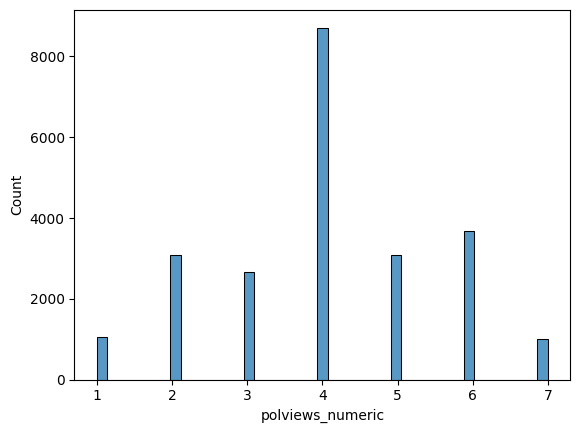

In [ ]:
sns.histplot(df['polviews_numeric'])

<Axes: xlabel='racerank1_numeric', ylabel='Count'>

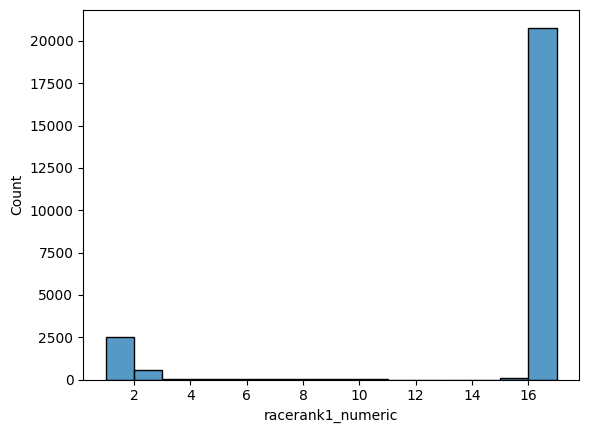

In [ ]:
sns.histplot(df['racerank1_numeric'])

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

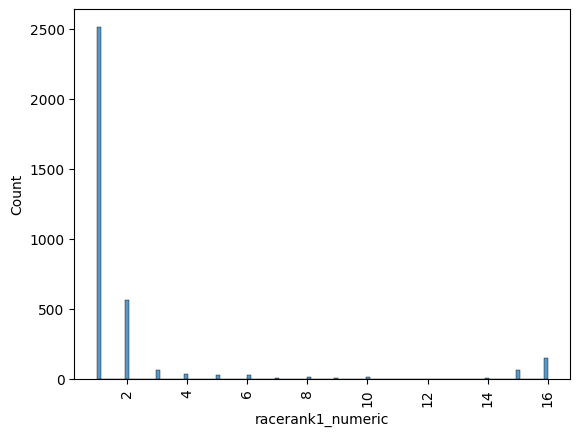

In [ ]:
mask = df['racerank1_numeric'] == 17
# Drop missing label (17) from racerank1_numeric
sns.histplot(df['racerank1_numeric'][~mask])
plt.xticks(rotation=90)

In [23]:
# drop missing labels in racerank1
Z = df.loc[:,['polviews','racerank1']][~mask]

# Merge 'slightly liberal', 'liberal', and 'extremely liberal' into one category, same for conservative
Z['polviews'] = Z['polviews'].replace({'slightly liberal': 'liberal', 'extremely liberal': 'liberal'})
Z['polviews'] = Z['polviews'].replace({'slight conservative': 'conservative', 'extremely conservative': 'conservative'})
Z['polviews'] = Z['polviews'].replace({'moderate, middle of the road': 'moderate'})

# Merge asian pacific islander
Z['racerank1'] = Z['racerank1'].replace({
 'asian indian': 'asian and pacific islander',
 'chinese': 'asian and pacific islander',
 'filipino': 'asian and pacific islander',
 'other asian': 'asian and pacific islander',
 'korean': 'asian and pacific islander',
 'vietnamese': 'asian and pacific islander',
 'japanese': 'asian and pacific islander',
 'other pacific islander': 'asian and pacific islander',
 'samoan': 'asian and pacific islander',
 'guamanian or chamorro': 'asian and pacific islander'
 })
# Group the DataFrame by 'race' and count occurrences of each label in the 'polviews' column
race_counts_by_polviews = Z.groupby('polviews')['racerank1'].value_counts()

print("Occurrences of each label in polviews for each race:")
print(race_counts_by_polviews)


Occurrences of each label in polviews for each race:
polviews      racerank1                       
liberal       white                               761
              black or african-american           174
              asian and pacific islander           52
              hispanic                             42
              american indian or alaska native     21
              some other race                      13
moderate      white                               809
              black or african-american           245
              asian and pacific islander           63
              hispanic                             55
              some other race                      28
              american indian or alaska native     24
conservative  white                               565
              black or african-american            58
              hispanic                             20
              some other race                      10
              american indian or ala

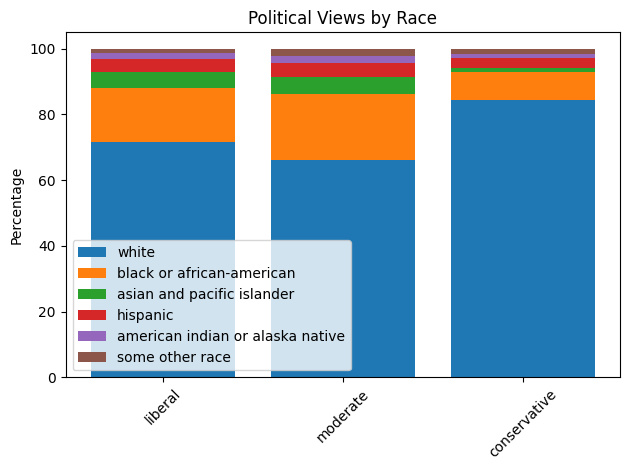

In [ ]:
# raw data based on polviews_counts_by_race
raw_race_by_polviews = {
  'liberal':[761, 174, 52, 42, 21, 13],
  'moderate':[809,245,63,55,24,28],
  'conservative':[565,58,8,20,9,10]
}

percent_race_by_polviews = {}

for polview, values in raw_race_by_polviews.items():
    total = sum(values)
    percentages = [(value / total) * 100 for value in values]
    percent_race_by_polviews[polview] = percentages


# Plotting
polviews_labels = list(percent_race_by_polviews.keys())
race = ['white','black or african-american','asian and pacific islander','hispanic','american indian or alaska native','some other race']
bottom = [0] * len(polviews_labels)

fig, ax = plt.subplots()

for i, race in enumerate(race):
    percentages = [percent_race_by_polviews[view][i] for view in polviews_labels]
    ax.bar(polviews_labels, percentages, label=race, bottom=bottom)
    bottom = [bottom[j] + percentages[j] for j in range(len(polviews_labels))]

ax.set_ylabel('Percentage')
ax.set_title('Political Views by Race')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

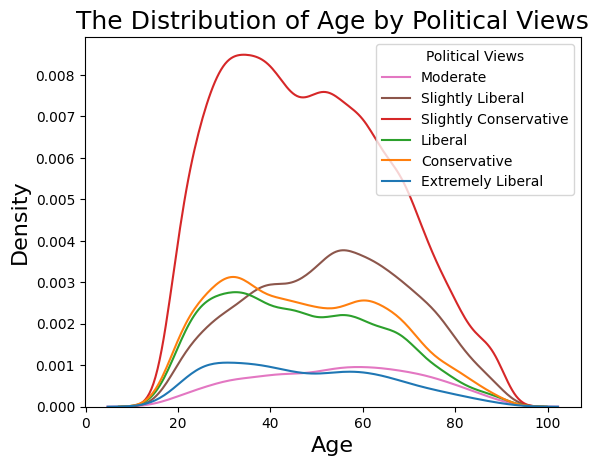

In [ ]:
#kernel density plot political views and age
sns.kdeplot(data=df,x='age',hue='polviews')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('The Distribution of Age by Political Views', fontsize=18)
plt.legend(title='Political Views', loc='upper right',labels=['Moderate', 'Slightly Liberal','Slightly Conservative', 'Liberal', 'Conservative', 'Extremely Liberal', 'Extremely Conservative'])

,polviews,racerank1
20586,liberal,white
20587,NaN,white
20588,moderate,white
20589,liberal,white
20590,NaN,white
...,...,...
24125,liberal,white
24126,moderate,white
24127,liberal,white
24128,liberal,white


In [42]:
#I think this is Carol's racerank1 variable cleaning. I did not know how to get the changes made in Z into original df so I can make visuals, so I added the rest of the columns of df into Z.
#All the codes are Carol's, I only added the rest of the columns form df ito Z. If you do know a better solution please edit.


Z = df.loc[:,['polviews','racerank1', 'age', 'polviews_numeric', 'racerank1_numeric']][~mask]

# Merge 'slightly liberal', 'liberal', and 'extremely liberal' into one category, same for conservative
Z['polviews'] = Z['polviews'].replace({'slightly liberal': 'liberal', 'extremely liberal': 'liberal'})
Z['polviews'] = Z['polviews'].replace({'slight conservative': 'conservative', 'extremely conservative': 'conservative'})
Z['polviews'] = Z['polviews'].replace({'moderate, middle of the road': 'moderate'})

# Merge asian pacific islander
Z['racerank1'] = Z['racerank1'].replace({
 'asian indian': 'asian and pacific islander',
 'chinese': 'asian and pacific islander',
 'filipino': 'asian and pacific islander',
 'other asian': 'asian and pacific islander',
 'korean': 'asian and pacific islander',
 'vietnamese': 'asian and pacific islander',
 'japanese': 'asian and pacific islander',
 'other pacific islander': 'asian and pacific islander',
 'samoan': 'asian and pacific islander',
 'guamanian or chamorro': 'asian and pacific islander'
 })

In [41]:
w= Z[Z["racerank1"].str.contains("white") == True] #to only include white racerank1 rows
e = Z[Z["racerank1"].str.contains("white") == False] #to exclude white racerank1 rows only

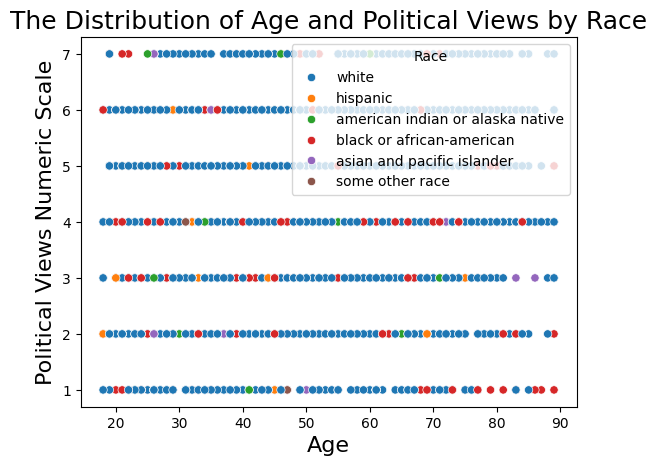

In [48]:
#entire racerank1 variable scatterplot
sns.scatterplot(data=Z, x='age', y='polviews_numeric', hue='racerank1')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Political Views Numeric Scale', fontsize=16)
plt.title('The Distribution of Age and Political Views by Race', fontsize=18)
plt.legend(title='Race', loc='upper right')

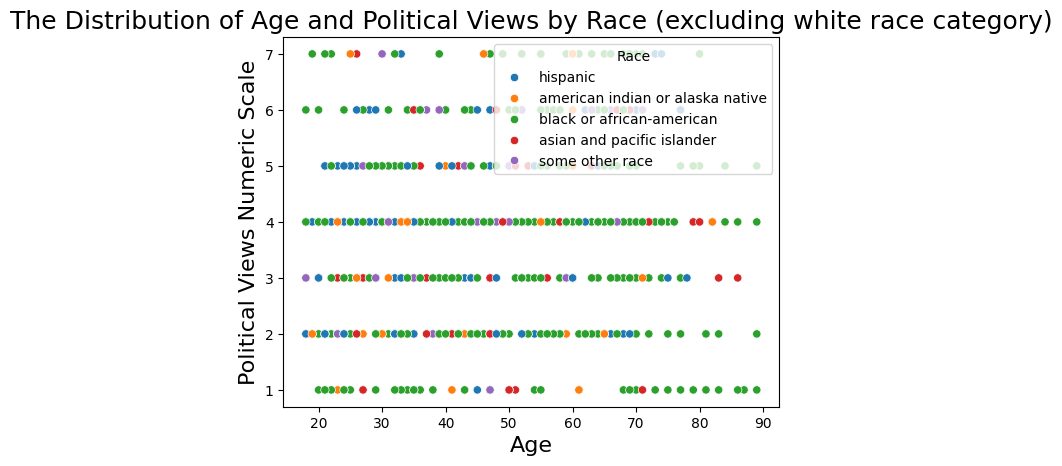

In [50]:
#excluding white race from racerank1 variable. Because there were a lot of white participants, I excluded the category to better see the otehr races visually.
sns.scatterplot(data=e, x='age', y='polviews_numeric', hue='racerank1')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Political Views Numeric Scale', fontsize=16)
plt.title('The Distribution of Age and Political Views by Race (excluding white race category)', fontsize=18)
plt.legend(title='Race', loc='upper right')

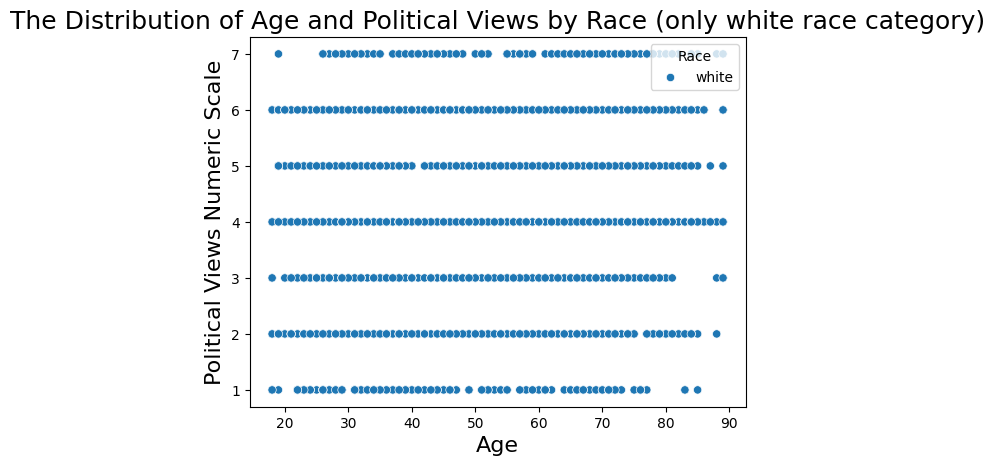

In [51]:
#only using white race in racerank1 variable
sns.scatterplot(data=w, x='age', y='polviews_numeric', hue='racerank1')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Political Views Numeric Scale', fontsize=16)
plt.title('The Distribution of Age and Political Views by Race (only white race category)', fontsize=18)
plt.legend(title='Race', loc='upper right')

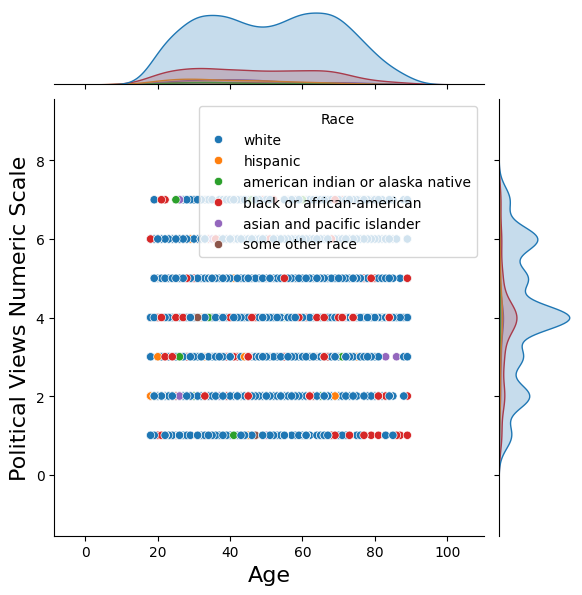

In [53]:
#jointplot of entire racerank1
sns.jointplot(x='age',y='polviews_numeric',data=Z,hue='racerank1')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Political Views Numeric Scale', fontsize=16)
plt.legend(title='Race', loc='upper right')

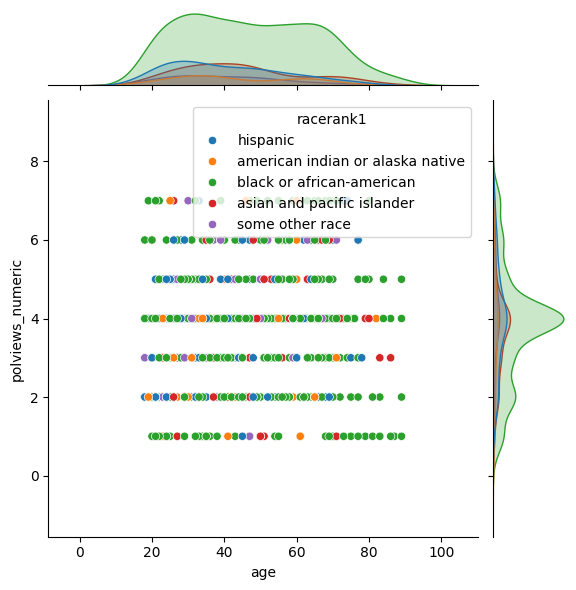

In [39]:
#joinplot excluding white race
sns.jointplot(x='age',y='polviews_numeric',data=e,hue='racerank1')

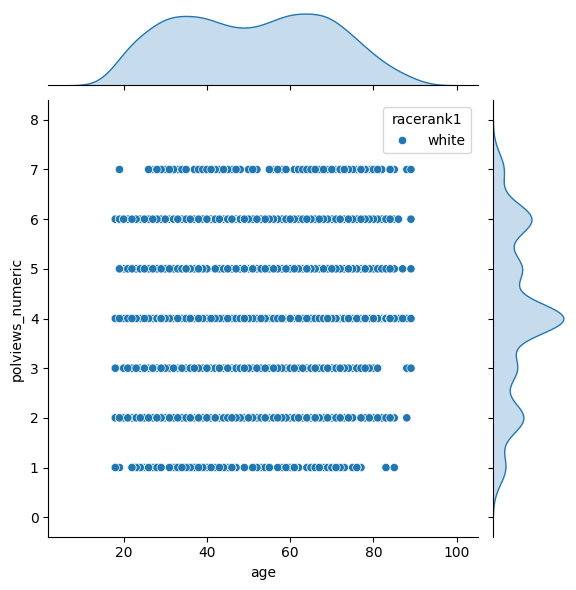

In [40]:
#joinplot of only white race from racerank1 variable
sns.jointplot(x='age',y='polviews_numeric',data=w,hue='racerank1')